![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- You can check “Meta” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in validation

In [15]:
import tensorflow as tf
train_dir_path = '/Users/suyash/Downloads/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.25)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [16]:
train_data_generator = train_datagen.flow_from_directory(
    train_dir_path,
    target_size=(32,32),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
  )


Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [17]:
validation_generator = train_datagen.flow_from_directory(
    train_dir_path, 
    target_size=(32,32),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation')



Found 7364 images belonging to 33 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [18]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(32,32,3,)))

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.BatchNormalization(axis=1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation="relu"))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Dense(33,activation="softmax"))

### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [19]:
import tensorflow.keras.losses as losses
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])

### Get model summary (2 Marks)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        56        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        1

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [21]:
history = model.fit_generator(
    train_data_generator,
    steps_per_epoch = train_data_generator.n//32,
    validation_data = validation_generator, 
    validation_steps = validation_generator.n//32,
    epochs = 20)

Epoch 1/20
691/691 [==============================] - 92s 133ms/step - loss: 2.4198 - accuracy: 0.2961 - val_loss: 2.2756 - val_accuracy: 0.3541
Epoch 2/20
691/691 [==============================] - 87s 126ms/step - loss: 1.2914 - accuracy: 0.5703 - val_loss: 1.5504 - val_accuracy: 0.5090
Epoch 3/20
691/691 [==============================] - 88s 127ms/step - loss: 0.8698 - accuracy: 0.7051 - val_loss: 1.2512 - val_accuracy: 0.5969
Epoch 4/20
691/691 [==============================] - 90s 131ms/step - loss: 0.6639 - accuracy: 0.7702 - val_loss: 0.9254 - val_accuracy: 0.7061
Epoch 5/20
691/691 [==============================] - 88s 128ms/step - loss: 0.5093 - accuracy: 0.8225 - val_loss: 0.8695 - val_accuracy: 0.7276
Epoch 6/20
691/691 [==============================] - 87s 125ms/step - loss: 0.4394 - accuracy: 0.8451 - val_loss: 0.8770 - val_accuracy: 0.7404
Epoch 7/20
691/691 [==============================] - 92s 133ms/step - loss: 0.3800 - accuracy: 0.8641 - val_loss: 0.7887 - val_ac

### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


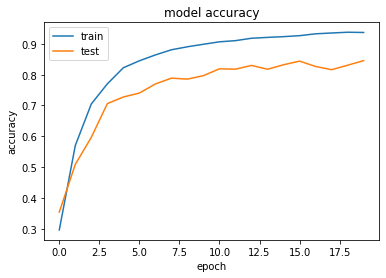

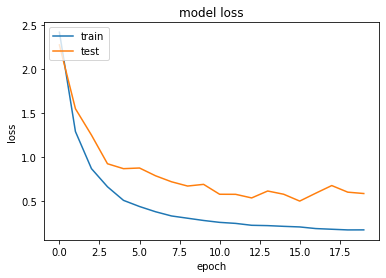

In [23]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()